# Q Learning simple example

In [1]:
import numpy as np
%matplotlib inline  
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:

    
class Play_ground(object):
    """
    define play ground and corresponding rules
    """
    def __init__(self, size):
        # TODO: read config fomr file
        # constants
        self.hole_score = -10
        self.goal_score = 10
        self.size = size

        # reward matrix
        self.r =  np.ones((self.size, self.size), dtype=np.float32) * -1
        # holes
        self.r[0, 1] = self.hole_score
        self.r[0, 2] = self.hole_score
        self.r[0, 4] = self.hole_score
        self.r[2, 1] = self.hole_score
        self.r[2, 4] = self.hole_score
        self.r[3, 3] = self.hole_score
        self.r[4, 0] = self.hole_score
        # the goal
        self.r[size - 2, size - 1] = self.goal_score

    def next_state(self, state, action):
        x, y = state

        # up
        if action == 0:
            y += 1
            y = min(y, self.size - 1)

        # down
        if action == 1:
            y -= 1
            y = max(y, 0)

        # right
        if action == 2:
            x += 1
            x = min(x, self.size - 1)

        # left
        if action == 3:
            x -= 1
            x = max(x, 0)

        return (x, y)

    def instant_reward(self, state):
        x, y = state
        return self.r[y, x]

    def end_of_episod(self, state):
        x, y = state
        # go to hole
        if self.r[y, x] == self.hole_score:
            return True
        # reach the goal
        if self.r[y, x] == self.goal_score:
            return True
        return False


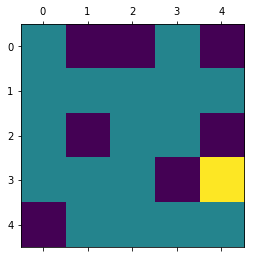

In [3]:
size = 5
g = Play_ground(size)
plt.matshow(g.r)
plt.show()

In [4]:
g.r

array([[ -1., -10., -10.,  -1., -10.],
       [ -1.,  -1.,  -1.,  -1.,  -1.],
       [ -1., -10.,  -1.,  -1., -10.],
       [ -1.,  -1.,  -1., -10.,  10.],
       [-10.,  -1.,  -1.,  -1.,  -1.]], dtype=float32)

# Q Learning helper functions:

In [5]:
action_space = 4


def e_greedy(Q, state, epsilon=.1):
    global action_space

    x, y = state
    action_values = Q[y, x]
    p = [1 - epsilon if i == max(action_values) else epsilon / (action_space - 1) for i in action_values]
    if sum(p) != 1:
        #print('uniform!')
        #print(action_values)
        #print(p)
        s = sum(p)
        #p = [1. / action_space for i in action_values]
        p = [i / s for i in p]
    return np.random.choice(range(action_space), p=p)


def V(Q, state):
    x, y = state
    action_values = Q[y, x]
    return max(action_values)

# Q Learning algorithm:

In [6]:
Q = np.zeros((size, size, action_space), dtype=np.float32)
#Q = np.random.uniform(-.01, .01, (size, size, action_space))

# parameters
gamma = .85
episodes = 1000
max_t = size * 3
s0 = (0, 0)

for e in range(episodes):
    # play an episod
    state = s0
    t = 0
    while True:
        action = e_greedy(Q, state)
        next_state = g.next_state(state, action)
        r = g.instant_reward(state)
        v = V(Q, next_state)
        x, y = state
        # update Q function
        if g.end_of_episod(state):
            Q[y, x, action] = r
            if r == 100:
                print('reach the goal @{}'.format(e))
            if r == -100:
                print('reach the hole @{}'.format(e))
            break
        else:
            Q[y, x, action] = r + gamma * v

        # step forward
        state = deepcopy(next_state)

        t += 1
        if t > max_t:
            break


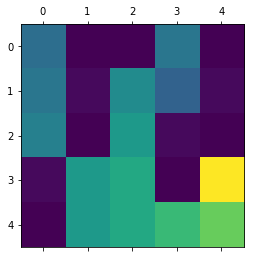

In [7]:
# y += 1
plt.matshow(Q[:, :, 0])
plt.show()

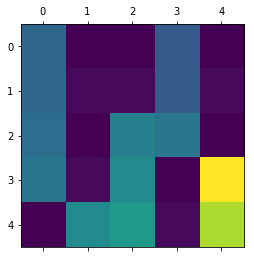

In [8]:
# y -= 1
plt.matshow(Q[:, :, 1])
plt.show()

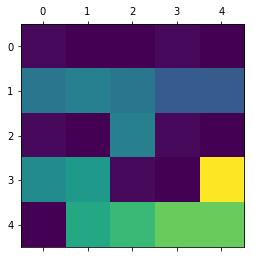

In [9]:
# x += 1
plt.matshow(Q[:, :, 2])
plt.show()

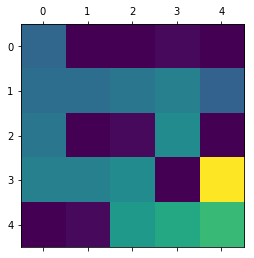

In [10]:
# x -= 1
plt.matshow(Q[:, :, 3])
plt.show()

In [11]:
# y += 1
Q[:, :, 0]

array([[ -2.806384  , -10.        , -10.        ,  -2.1251578 ,
        -10.        ],
       [ -2.1251578 ,  -9.5       ,  -0.3808414 ,  -3.7086313 ,
         -9.5       ],
       [ -1.3237152 , -10.        ,   0.72842187,  -9.5       ,
        -10.        ],
       [ -9.5       ,   0.72842187,   2.0334375 , -10.        ,
         10.        ],
       [-10.        ,   0.72842187,   2.0334375 ,   3.56875   ,
          5.375     ]], dtype=float32)

In [12]:
# y -= 1
Q[:, :, 1]

array([[ -3.3854265 , -10.        , -10.        ,  -4.1523366 ,
        -10.        ],
       [ -3.3854265 ,  -9.5       ,  -9.5       ,  -4.1523366 ,
         -9.5       ],
       [ -2.806384  , -10.        ,  -1.3237152 ,  -2.1251578 ,
        -10.        ],
       [ -2.1251578 ,  -9.5       ,  -0.3808414 , -10.        ,
         10.        ],
       [-10.        ,  -0.3808414 ,   0.72842187,  -9.5       ,
          7.5       ]], dtype=float32)

In [13]:
# x += 1
Q[:, :, 2]

array([[ -9.5       , -10.        , -10.        ,  -9.5       ,
        -10.        ],
       [ -2.1251578 ,  -1.3237152 ,  -2.1251578 ,  -4.1523366 ,
         -4.1523366 ],
       [ -9.5       , -10.        ,  -1.3237152 ,  -9.5       ,
        -10.        ],
       [ -0.3808414 ,   0.72842187,  -9.5       , -10.        ,
         10.        ],
       [-10.        ,   2.0334375 ,   3.56875   ,   5.375     ,
          5.375     ]], dtype=float32)

In [14]:
# x -= 1
Q[:, :, 3]

array([[ -3.3854265 , -10.        , -10.        ,  -9.5       ,
        -10.        ],
       [ -2.806384  ,  -2.806384  ,  -2.1251578 ,  -1.3237152 ,
         -3.7086313 ],
       [ -2.1251578 , -10.        ,  -9.5       ,  -0.3808414 ,
        -10.        ],
       [ -1.3237152 ,  -1.3237152 ,  -0.3808414 , -10.        ,
         10.        ],
       [-10.        ,  -9.5       ,   0.72842187,   2.0334375 ,
          3.56875   ]], dtype=float32)

current state: (0, 0)


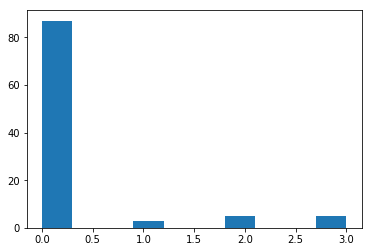

decision[0, 1, 2, 3]? 100
----------------------------------------


In [15]:
# play an episod supervisely:
state = (0, 0)
while True:
    print('current state: {}'.format(state))
    l = []
    for i in range(100):
        l.append(e_greedy(Q, state, .1))
    plt.hist(l)
    plt.show()
    action = int(input('decision[0, 1, 2, 3]? '))
    print('-' * 40)
    if action > 3:
        break
    state = g.next_state(state, action)
    if g.end_of_episod(state):
        break


# this is where DQN comes in...

In [16]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F


class Flatten(nn.Module):
    def __init__(self):
        super(Flatten, self).__init__()
        
    def forward(self, x):
        N = x.size(0)
        return x.view(N, -1)


class DQN_model(nn.Module):
    
    def __init__(self, in_dim, num_class):
        super(DQN_model, self).__init__()
        self.main = nn.Sequential()
        self.main.add_module('flat', Flatten())
        self.main.add_module('fc1', nn.Linear(size * size, 512))
        self.main.add_module('lrelu1', nn.LeakyReLU(0.1, inplace=True))
        self.main.add_module('fc2', nn.Linear(512, 512))
        self.main.add_module('lrelu2', nn.LeakyReLU(0.1, inplace=True))
        self.main.add_module('fc3', nn.Linear(512, num_class))
        
    def forward(self, x):
        return self.main(x)


my_model = DQN_model(size, action_space)

# DQN helper functions

In [17]:
from torch.utils.data import Dataset
from collections import namedtuple
Transition = namedtuple('Transition', ('state', 'action_values', 'action', 'reward', 'value', 'next_state', 'termination_state', 'label'))


class Replay_memory(Dataset):
    def __init__(self, replay_memory_size, gamma=.85):
        super(Replay_memory, self).__init__()
        
        # replay memory
        self.replay_memory = []
        self.replay_memory_size = replay_memory_size
        self.gamma = gamma
        
    def e_greedy(self, action_values, epsilon):
        global action_space

        p = [1 - epsilon if i == max(action_values) else epsilon / (action_space - 1) for i in action_values]
        if sum(p) != 1:
            s = sum(p)
            p = [i / s for i in p]
        return np.random.choice(range(action_space), p=p)
        
    def play_episode(self, model, pg, s0, max_t, epsilon):
        episode_replay = []
        t = 0
        state = deepcopy(s0)
        while True:
            #action = e_greedy(Q, state)
            state_var = Variable(self.state_to_onehot(state))
            action_values = model(state_var)[0]
            action = self.e_greedy(action_values.data.numpy(), epsilon)
            
            next_state = pg.next_state(state, action)
            r = pg.instant_reward(state)
            #v = V(Q, next_state)
            next_state_var = Variable(self.state_to_onehot(next_state))
            v = model(next_state_var)
            v = torch.max(v.view(-1)).data[0]
            
            if pg.end_of_episod(state):
                label = self.action_label(action_values, action, float(r))
            else:
                label = self.action_label(action_values, action, r + self.gamma * v)
            
            episode_replay.append(Transition(state, action_values, action, r, v, next_state, pg.end_of_episod(state), label))
            if pg.end_of_episod(state):
                #Q[y, x, action] = r
                if r == 10:
                    print('-' * 40)
                    print('reach the goal @{}'.format(t))
                    print('-' * 40)
                    pass
                if r == -10:
                    #print('reach the hole @{}'.format(t))
                    pass
                break
            #else:
            #Q[y, x, action] = r + gamma * v

            # step forward
            state = deepcopy(next_state)

            t += 1
            if t > max_t:
                break
        
        return episode_replay

    def refill_reply(self, model, pg, s0, max_t, epsilon=.1):
        self.replay_memory = []
        while len(self.replay_memory) < self.replay_memory_size:
            self.replay_memory += self.play_episode(model, pg, s0, max_t, epsilon)
        self.replay_memory = self.replay_memory[:self.replay_memory_size]
        
    def state_to_onehot(self, state):
        x, y = state
        result = torch.zeros((1, 1, size, size))
        result[0, 0, y, x] = 1.
        return result
    
    def action_label(self, net_out, action, target):
        result = net_out.clone()
        result[action] = target
        return result
    
    def __len__(self):
        return self.replay_memory_size
    
    def __getitem__(self, ind):
        sample = self.replay_memory[ind]
        x = self.state_to_onehot(sample.state)
        y = sample.label
        
        return x, y


def my_collate(batch):
    N = len(batch)
    x, y = zip(*batch)
    x = torch.cat(x, 0)
    y = torch.cat(y, 0).view(N, -1)
    return Variable(x), y
    

# make things clean and train

In [18]:
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F

my_model = DQN_model(size, action_space)

rpm = Replay_memory(1024)
rpm.refill_reply(my_model, g, s0, max_t, epsilon=.5)
dataloader = DataLoader(rpm, batch_size=32, collate_fn=my_collate, shuffle=True, num_workers=4, drop_last=True)

optimizer = optim.RMSprop(my_model.parameters(), lr=.001)

# before training
epsilon = 1
print(my_model(Variable(rpm.state_to_onehot((0, 0)))))
for e in range(200):
    epsilon = max(.1, epsilon - .005)
    print('epoch: {:04d}, epsilon: {}'.format(e, epsilon))
    my_model.cpu()
    print(my_model(Variable(rpm.state_to_onehot((0, 0)))))
    rpm.refill_reply(my_model, g, s0, max_t, epsilon=epsilon)
    my_model.cuda()
    for x, y in dataloader:
        x = x.cuda()
        y = y.cuda()
        out = my_model(x)
        loss = torch.sum((out - y) * (out - y)) / out.size(0)
        #y.requires_grad = False
        #loss = F.smooth_l1_loss(out.view(-1), y.view(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
my_model.cpu()
print(my_model(Variable(rpm.state_to_onehot((0, 0)))))

Variable containing:
1.00000e-02 *
 -0.2016  0.7160 -1.8572 -3.1382
[torch.FloatTensor of size 1x4]

epoch: 0000, epsilon: 0.995
Variable containing:
1.00000e-02 *
 -0.2016  0.7160 -1.8572 -3.1382
[torch.FloatTensor of size 1x4]

epoch: 0001, epsilon: 0.99
Variable containing:
-0.2811  0.0342 -0.2663 -0.3195
[torch.FloatTensor of size 1x4]

epoch: 0002, epsilon: 0.985
Variable containing:
-0.5462  0.0272 -0.5547 -0.4858
[torch.FloatTensor of size 1x4]

epoch: 0003, epsilon: 0.98
Variable containing:
-0.6851  0.0347 -0.6507 -0.6469
[torch.FloatTensor of size 1x4]

epoch: 0004, epsilon: 0.975
Variable containing:
-0.7804  0.0160 -0.8239 -0.7524
[torch.FloatTensor of size 1x4]

epoch: 0005, epsilon: 0.97
Variable containing:
-0.8420 -0.0316 -0.8999 -0.8149
[torch.FloatTensor of size 1x4]

epoch: 0006, epsilon: 0.965
Variable containing:
-0.9085 -0.0404 -0.8989 -0.8798
[torch.FloatTensor of size 1x4]

epoch: 0007, epsilon: 0.96
Variable containing:
-0.9403 -0.0595 -0.9065 -0.9212
[torch.Fl

epoch: 0062, epsilon: 0.6849999999999997
Variable containing:
-4.1076 -3.9641 -8.4870 -4.0477
[torch.FloatTensor of size 1x4]

epoch: 0063, epsilon: 0.6799999999999997
Variable containing:
-4.1257 -4.1046 -8.4788 -4.0902
[torch.FloatTensor of size 1x4]

epoch: 0064, epsilon: 0.6749999999999997
Variable containing:
-3.9634 -3.9936 -8.1999 -4.0029
[torch.FloatTensor of size 1x4]

epoch: 0065, epsilon: 0.6699999999999997
Variable containing:
-4.0968 -4.0918 -8.3666 -4.1063
[torch.FloatTensor of size 1x4]

epoch: 0066, epsilon: 0.6649999999999997
Variable containing:
-4.0903 -4.0255 -8.4204 -4.1004
[torch.FloatTensor of size 1x4]

epoch: 0067, epsilon: 0.6599999999999997
Variable containing:
-4.0799 -4.0887 -8.4889 -4.0938
[torch.FloatTensor of size 1x4]

epoch: 0068, epsilon: 0.6549999999999997
Variable containing:
-4.2222 -4.1353 -8.5768 -4.1599
[torch.FloatTensor of size 1x4]

epoch: 0069, epsilon: 0.6499999999999997
Variable containing:
-4.0203 -4.0056 -8.2121 -3.9317
[torch.FloatTenso

----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
epoch: 0108, epsilon: 0.4549999999999995
Variable containing:
-4.9053 -4.9188 -9.0696 -4.9133
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @15
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
epoch: 0109, epsilon: 0.4499999999999995
Variable containing:
-5.

epoch: 0116, epsilon: 0.4149999999999995
Variable containing:
-5.0259 -5.0308 -9.0833 -5.0607
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @14
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @14
----------------------------------------
----------------------------------------
reach the goal @15
----------------------------------------
----------------------------------------
reach the goal @15
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @12
------

----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
epoch: 0122, epsilon: 0.38499999999999945
Variable containing:
-3.5043 -4.4259 -8.4775 -4.4946
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @14
----

----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @13
---------------------------------

epoch: 0130, epsilon: 0.3449999999999994
Variable containing:
-2.6189 -3.5991 -8.2964 -3.5358
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @14
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @14
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @12
-------

----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @15
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @15
----------------------------------------
----------------------------------------
reach the goal @14
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
--------------------------------

----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @14
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
epoch: 0137, epsilon: 0.3099999999999994
Variable containing:
-2.1604 -3.0694 -8.6152 -3.0173


epoch: 0139, epsilon: 0.2999999999999994
Variable containing:
-2.3034 -2.9414 -8.4148 -2.8854
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @15
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @14
--------

----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @14
----------------------------------------
----------------------------------------
reach the goal @14
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @14
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------

epoch: 0144, epsilon: 0.27499999999999936
Variable containing:
-2.2062 -2.8264 -8.4585 -2.8408
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
-------

epoch: 0146, epsilon: 0.26499999999999935
Variable containing:
-2.4134 -2.8068 -8.3807 -2.7583
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @14
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @15
----------------------------------------
----------------------------------------
reach the goal @11
------

epoch: 0148, epsilon: 0.25499999999999934
Variable containing:
-2.2733 -2.6725 -8.3285 -2.6633
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @14
----------------------------------------
----------------------------------------
reach the goal @13
------

epoch: 0150, epsilon: 0.24499999999999933
Variable containing:
-2.3495 -2.8171 -8.6933 -2.7709
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @9
-----

epoch: 0152, epsilon: 0.23499999999999932
Variable containing:
-2.4896 -2.6982 -8.5603 -2.6968
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @14
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @14
--------

----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @14
------------------------------------

----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @14
----------------------------------------
epoch: 0157, epsilon: 0.2099999999999993
Variable containing:
-2.3276 -2.8497 -8.5045 -2.7691
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
-----

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
-------------------------------------

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------

epoch: 0162, epsilon: 0.18499999999999928
Variable containing:
-2.7179 -2.9240 -8.5135 -2.8520
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @14
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
-------

----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @13
--------------------------------

epoch: 0165, epsilon: 0.16999999999999926
Variable containing:
-2.6596 -2.8455 -8.4986 -2.8151
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @15
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @13
-----

----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @14
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------

epoch: 0168, epsilon: 0.15499999999999925
Variable containing:
-2.7954 -2.9815 -8.7172 -2.8603
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
------

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
--------------------------------------

epoch: 0171, epsilon: 0.13999999999999924
Variable containing:
-2.4609 -2.8339 -8.7600 -2.7928
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
-----

----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @14
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------

epoch: 0174, epsilon: 0.12499999999999922
Variable containing:
-2.6984 -2.9441 -8.9767 -2.9288
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @15
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
------

----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
------------------------------------

epoch: 0177, epsilon: 0.10999999999999921
Variable containing:
-2.5539 -2.9119 -8.9560 -2.9190
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
--------

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
-------------------------------------

epoch: 0180, epsilon: 0.1
Variable containing:
-2.7604 -3.0713 -9.8174 -3.1782
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
-------------------------

epoch: 0181, epsilon: 0.1
Variable containing:
-2.8178 -3.1070 -9.8177 -3.1554
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
-------------------------

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
-------------------------------------

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
-------------------------------------

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @14
----------------------------------------
----------------------------------------
reach the goal @15
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
-------------------------------------

epoch: 0187, epsilon: 0.1
Variable containing:
-2.4901 -2.9167 -9.5346 -2.8917
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @14
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
-----------------------

epoch: 0188, epsilon: 0.1
Variable containing:
-2.5891 -2.9669 -9.5923 -2.9206
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @13
-------------------------

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
-------------------------------------

epoch: 0191, epsilon: 0.1
Variable containing:
 -2.9229  -3.2710 -10.0645  -3.2882
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
---------------------

----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------

epoch: 0194, epsilon: 0.1
Variable containing:
 -2.8705  -3.2488 -10.1300  -3.3342
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @13
--------------------

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
-------------------------------------

----------------------------------------
reach the goal @12
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @13
----------------------------------------
----------------------------------------
reach the goal @9
-------------------------------------

epoch: 0198, epsilon: 0.1
Variable containing:
 -2.9566  -3.4450 -10.5153  -3.5434
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @10
----------------------------------------
----------------------------------------
reach the goal @9
----------------------

epoch: 0199, epsilon: 0.1
Variable containing:
 -3.0847  -3.4622 -10.5542  -3.5695
[torch.FloatTensor of size 1x4]

----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @9
----------------------------------------
----------------------------------------
reach the goal @11
----------------------------------------
----------------------------------------
reach the goal @9
-----------------------

Variable containing:
 -2.9476  -3.5219 -10.8964  -3.6641
[torch.FloatTensor of size 1x4]



In [19]:
DQN = np.zeros((size, size, action_space), dtype=np.float32)

for i in range(size):
    for j in range(size):
        result = my_model(Variable(rpm.state_to_onehot((i, j))))
        for a in range(action_space):
            DQN[j, i, a] = result[0, a]

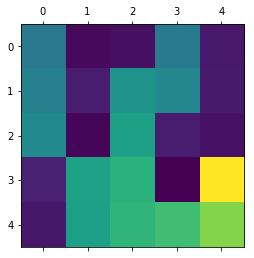

In [20]:
# y += 1
plt.matshow(DQN[:, :, 0])
plt.show()

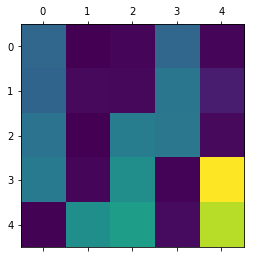

In [21]:
# y -= 1
plt.matshow(DQN[:, :, 1])
plt.show()

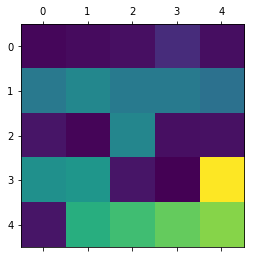

In [22]:
# x += 1
plt.matshow(DQN[:, :, 2])
plt.show()

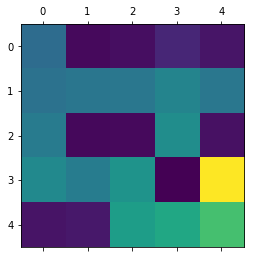

In [23]:
# x -= 1
plt.matshow(DQN[:, :, 3])
plt.show()

In [24]:
# y += 1
DQN[:, :, 0]

array([[ -2.9475536 , -10.90814   , -10.583827  ,  -2.7501924 ,
         -9.984085  ],
       [ -2.2206879 ,  -9.731616  ,  -0.5559574 ,  -1.6115831 ,
         -9.959696  ],
       [ -1.3407056 , -11.075329  ,   0.62291014,  -9.869501  ,
        -10.41021   ],
       [ -9.525223  ,   0.7160025 ,   2.130502  , -11.458866  ,
          9.827911  ],
       [-10.069019  ,   0.5966406 ,   2.4863322 ,   3.2816088 ,
          5.851485  ]], dtype=float32)

In [25]:
# y -= 1
DQN[:, :, 1]

array([[ -3.5218852 , -10.031421  ,  -9.741702  ,  -3.4944313 ,
         -9.780436  ],
       [ -3.6491349 ,  -9.533991  ,  -9.646224  ,  -2.2875168 ,
         -8.506868  ],
       [ -2.5422058 ,  -9.976194  ,  -1.6634408 ,  -2.2023113 ,
         -9.565725  ],
       [ -1.9409952 ,  -9.765159  ,  -0.27821478,  -9.81559   ,
          9.681142  ],
       [ -9.891047  ,  -0.22815865,   0.9270611 ,  -9.427865  ,
          7.540664  ]], dtype=float32)

In [26]:
# x += 1
DQN[:, :, 2]

array([[-10.896426 , -10.6618595, -10.371678 ,  -8.569707 , -10.468568 ],
       [ -2.7223666,  -1.4949555,  -2.546118 ,  -2.6297045,  -3.341825 ],
       [-10.072263 , -10.935529 ,  -1.5561339, -10.343081 , -10.336196 ],
       [ -0.6368371,  -0.1788122, -10.080216 , -11.24303  ,   9.83578  ],
       [-10.008969 ,   1.9342972,   3.3557947,   4.8868465,   6.032592 ]],
      dtype=float32)

In [27]:
# x -= 1
DQN[:, :, 3]

array([[ -3.664116  , -10.577399  , -10.328109  ,  -8.864839  ,
         -9.913528  ],
       [ -3.1367927 ,  -2.8262515 ,  -2.768558  ,  -1.5969454 ,
         -2.7683077 ],
       [ -2.3335805 , -10.607248  , -10.531878  ,  -0.78202003,
        -10.123727  ],
       [ -1.0768526 ,  -2.2463906 ,  -0.28325546, -11.08771   ,
          9.958362  ],
       [ -9.98861   ,  -9.702111  ,   0.63547176,   1.4462247 ,
          3.729159  ]], dtype=float32)

current state: (0, 0)


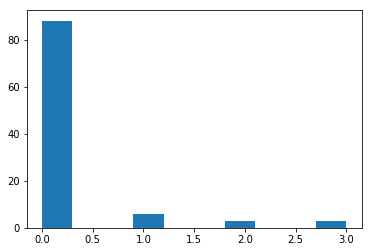

decision[0, 1, 2, 3]? 0
----------------------------------------
current state: (0, 1)


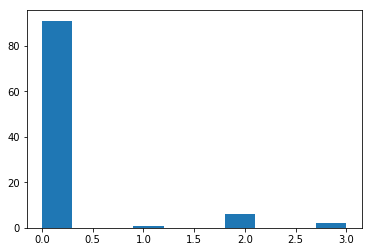

decision[0, 1, 2, 3]? 0
----------------------------------------
current state: (0, 2)


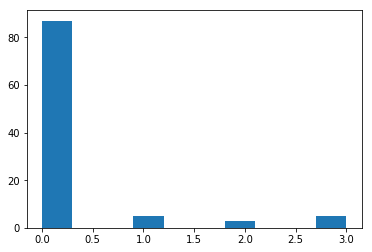

decision[0, 1, 2, 3]? 0
----------------------------------------
current state: (0, 3)


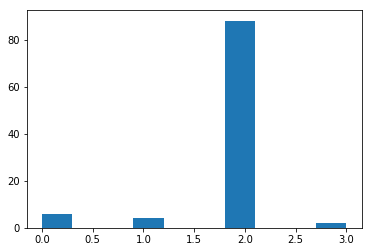

decision[0, 1, 2, 3]? 2
----------------------------------------
current state: (1, 3)


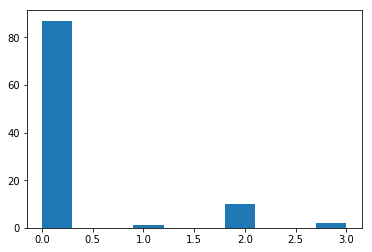

decision[0, 1, 2, 3]? 0
----------------------------------------
current state: (1, 4)


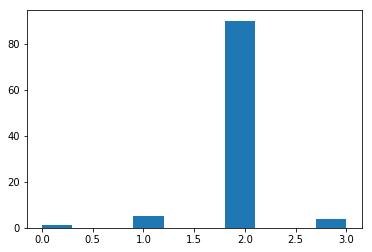

decision[0, 1, 2, 3]? 2
----------------------------------------
current state: (2, 4)


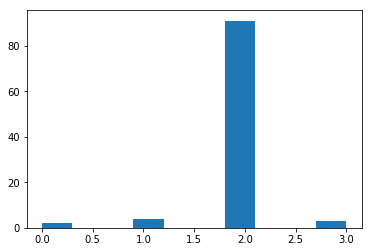

decision[0, 1, 2, 3]? 2
----------------------------------------
current state: (3, 4)


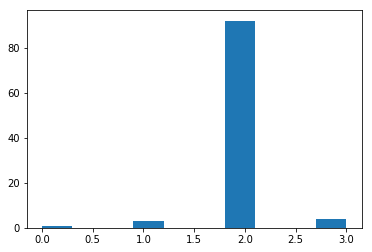

decision[0, 1, 2, 3]? 2
----------------------------------------
current state: (4, 4)


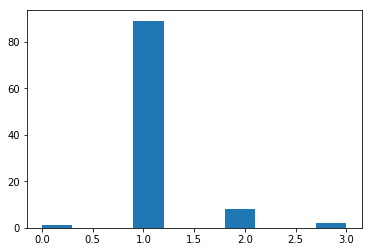

decision[0, 1, 2, 3]? 1
----------------------------------------


In [30]:
# play an episod supervisely:
state = (0, 0)
while True:
    print('current state: {}'.format(state))
    l = []
    for i in range(100):
        l.append(e_greedy(DQN, state, .1))
    plt.hist(l)
    plt.show()
    action = int(input('decision[0, 1, 2, 3]? '))
    print('-' * 40)
    if action > 3:
        break
    state = g.next_state(state, action)
    if g.end_of_episod(state):
        break
